In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import misc, ndimage
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
%matplotlib inline

Using TensorFlow backend.


In [3]:
#df = pd.read_csv("E:/Fayaz/newdata.csv")

train_path = "Data/train"
valid_path = "Data/valid"
test_path = "Data/test"

In [5]:
import matplotlib.image as mpimg

train_datagen = ImageDataGenerator()


train_batches = train_datagen.flow_from_directory(train_path, target_size=(128,128), classes=['normal', 'abnormal'], batch_size=5)
valid_batches = train_datagen.flow_from_directory(valid_path, target_size=(128,128), classes=['normal', 'abnormal'], batch_size=2)
test_batches = train_datagen.flow_from_directory(test_path, target_size=(128,128), classes=['normal', 'abnormal'], batch_size=6)
#os.listdir()
#train_labels = df.iloc[:,-1]

Found 58 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [6]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
#train_samples = df.iloc[:, 0:9]

#train_samples

In [281]:
string_labels =train_labels.values
binary_labels = []
for sl in string_labels:
    if sl == 'a':
        binary_labels.append(0)
    else:
        binary_labels.append(1)

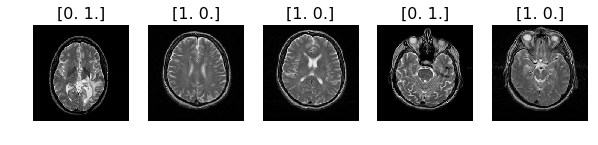

In [9]:
#binary_labels
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

In [10]:
model = Sequential([
    Conv2D(64, (4,4), input_shape=(224,224,3), activation='relu'),
    Flatten(),
    Dense(2, activation="softmax")
])

model.summary()

In [11]:
model.summary()
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 221, 221, 64)      3136      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3125824)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6251650   
Total params: 6,254,786
Trainable params: 6,254,786
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model.fit(train_samples.values, binary_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)
model.fit_generator(train_batches, steps_per_epoch=12, validation_data=valid_batches, validation_steps=3, epochs=5, verbose=2)

Epoch 1/5
 - 53s - loss: 5.1284 - acc: 0.6825 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 2/5
 - 16s - loss: 4.9095 - acc: 0.6954 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 3/5
 - 21s - loss: 4.5789 - acc: 0.7159 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 4/5
 - 16s - loss: 4.9095 - acc: 0.6954 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 5/5
 - 20s - loss: 4.7442 - acc: 0.7057 - val_loss: 10.7454 - val_acc: 0.3333


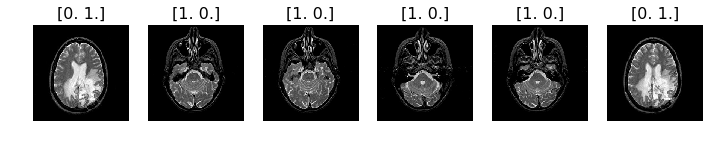

In [13]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)
#prediction_data = df.iloc[59:, 0:9]
#prediction_data

In [ ]:
test_labels = test_labels[:, 0]
test_labels
#predicted_classes = model.predict_classes(prediction_data, batch_size=10, verbose=2)

In [ ]:
predictions = model.predict_generator(test_batches, steps=1, verbose=2)
#df.iloc[59:,:]
predictions

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
# test_labels = []
# for sl in df.iloc[59:,-1]:
#     if sl == 'a':
#         test_labels.append(0)
#     else:
#         test_labels.append(1)
cm = confusion_matrix(test_labels, predictions[:,0])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['Abnormal', 'Normal']
plot_confusion_matrix(cm, cm_plot_labels, title="Confustion Matrix")

In [ ]:
json_model = model.to_json()

In [ ]:
json_model

In [ ]:
model.save('my_model_weights.h5')

In [ ]:
from keras.models import load_model

newm = load_model('my_model_weights.h5')

In [ ]:
newm.summary()

In [15]:
## Build Fine-Tuned VGG16 model
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
type(vgg16_model)

keras.engine.training.Model

In [ ]:
model = Sequential()
i = 0
total_layers = len(vgg16_model.layers) - 1
print(total_layers)
for layer in vgg16_model.layers:
    if (i < total_layers):
        model.add(layer)
    i += 1

In [ ]:
model.add(Dense(2, activation='softmax'))

In [14]:
model.summary()
# Train the fine-tuned
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 221, 221, 64)      3136      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3125824)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6251650   
Total params: 6,254,786
Trainable params: 6,254,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(train_batches, steps_per_epoch=12, validation_data=valid_batches, validation_steps=3, epochs=5, verbose=2)

In [58]:
### Custom MOdel
IMG_W = 128
IMG_H = 128
cmodel = Sequential()
cmodel.add(Conv2D(32, (3, 3), input_shape=(IMG_W, IMG_W, 3), activation='relu'))
cmodel.add(Conv2D(64, (3, 3), input_shape=(IMG_W, IMG_W, 3), activation='relu'))
cmodel.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format='channels_last'))

cmodel.add(Conv2D(128, (3, 3), input_shape=(IMG_W, IMG_W, 3), activation='relu'))
cmodel.add(Conv2D(256, (3, 3), input_shape=(IMG_W, IMG_W, 3), activation='relu'))
cmodel.add(MaxPooling2D(pool_size=(4,4), strides=None, padding='valid', data_format='channels_last'))
cmodel.add(Flatten())
cmodel.add(Dense(2, activation='softmax'))

cmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 58, 58, 256)       295168    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 50176)             0         
__________

In [59]:
cmodel.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
train_datagen = ImageDataGenerator()


train_batches = train_datagen.flow_from_directory(train_path, target_size=(128,128), classes=['normal', 'abnormal'], batch_size=5)
valid_batches = train_datagen.flow_from_directory(valid_path, target_size=(128,128), classes=['normal', 'abnormal'], batch_size=2)
test_batches = train_datagen.flow_from_directory(test_path, target_size=(128,128), classes=['normal', 'abnormal'], batch_size=6)

cmodel.fit_generator(train_batches, steps_per_epoch=12, validation_data=valid_batches, validation_steps=3, epochs=10, verbose=2)

Found 58 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/10
 - 21s - loss: 5.7109 - acc: 0.6221 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 2/10
 - 19s - loss: 4.7442 - acc: 0.7057 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 3/10
 - 18s - loss: 4.9095 - acc: 0.6954 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 4/10
 - 18s - loss: 4.7442 - acc: 0.7057 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 5/10
 - 18s - loss: 4.5789 - acc: 0.7159 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 6/10
 - 19s - loss: 4.5789 - acc: 0.7159 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 7/10
 - 18s - loss: 4.7442 - acc: 0.7057 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 8/10
 - 19s - loss: 4.5789 - acc: 0.7159 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 9/10
 - 20s - loss: 4.9095 - acc: 0.6954 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 10/10
 - 25s - loss: 4.7442 - acc: 0.7057 - val_loss: 10.7454 - val_acc: 0.3333


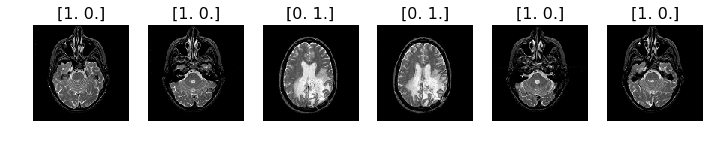

In [46]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [47]:
test_labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [43]:
predictions = cmodel.predict_generator(test_batches, steps=1, verbose=2)

In [44]:
predictions

array([[0.9649528 , 0.03504723],
       [0.99601513, 0.00398482],
       [0.9972479 , 0.00275211],
       [0.04241313, 0.95758694],
       [0.02198392, 0.9780161 ],
       [0.9806223 , 0.01937768]], dtype=float32)

In [49]:
predictions = np.argmax(predictions, axis = -1)
#cm = confusion_matrix(test_labels, predictions[:,0])

In [50]:
predictions

array([0, 0, 0, 1, 1, 0], dtype=int64)

In [76]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [89]:
normal_image_path = "Data/train/normal/1.jpg"
ab_image_path = "Data/train/abnormal/53.jpg"

In [90]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [91]:
img = load_img(ab_image_path)  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

#aug_iter = gen.flow(image)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='Data/train/abnormal/', save_prefix='ab', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [95]:
train_datagen = ImageDataGenerator()


train_batches = train_datagen.flow_from_directory(train_path, target_size=(150,150), classes=['normal', 'abnormal'], batch_size=5)
valid_batches = train_datagen.flow_from_directory(valid_path, target_size=(150,150), classes=['normal', 'abnormal'], batch_size=2)
test_batches = train_datagen.flow_from_directory(test_path, target_size=(150,150), classes=['normal', 'abnormal'], batch_size=6)


Found 100 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [110]:
cmodel = Sequential()
cmodel.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
cmodel.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format='channels_last'))

cmodel.add(Conv2D(32, (3, 3), activation='relu'))
cmodel.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format='channels_last'))

cmodel.add(Conv2D(64, (3, 3), activation='relu'))
cmodel.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format='channels_last'))



cmodel.add(Flatten())
cmodel.add(Dense(64, activation='relu'))
cmodel.add(Dense(2, activation='sigmoid'))

cmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 18496)             0         
__________

In [117]:
cmodel.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [119]:
cmodel.fit_generator(train_batches, steps_per_epoch=20, validation_data=valid_batches, validation_steps=3, epochs=5, verbose=2)

Epoch 1/5
 - 3s - loss: nan - acc: 0.6200 - val_loss: 1.1921e-07 - val_acc: 0.3333
Epoch 2/5
 - 4s - loss: nan - acc: 0.6200 - val_loss: 1.1921e-07 - val_acc: 0.3333
Epoch 3/5
 - 3s - loss: nan - acc: 0.6200 - val_loss: 1.1921e-07 - val_acc: 0.3333
Epoch 4/5
 - 3s - loss: nan - acc: 0.6200 - val_loss: 1.1921e-07 - val_acc: 0.3333
Epoch 5/5
 - 3s - loss: nan - acc: 0.6200 - val_loss: 1.1921e-07 - val_acc: 0.3333


In [120]:
modeln = load_model('my_model.h5')

NameError: name 'load_model' is not defined

In [121]:
from keras.models import load_model
modelN = load_model('my_model.h5')

In [123]:
modelN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [125]:
train_datagen = ImageDataGenerator()


train_batches = train_datagen.flow_from_directory(train_path, target_size=(150,150), classes=['normal', 'abnormal'], batch_size=5)
valid_batches = train_datagen.flow_from_directory(valid_path, target_size=(150,150), classes=['normal', 'abnormal'], batch_size=2)
test_batches = train_datagen.flow_from_directory(test_path, target_size=(150,150), classes=['normal', 'abnormal'], batch_size=6)



Found 202 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


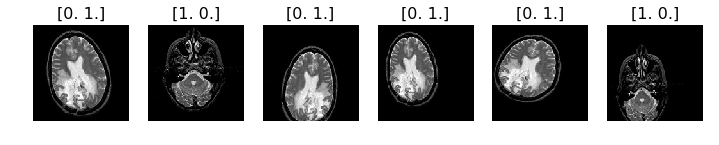

In [126]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [127]:
predictions = modelN.predict_generator(test_batches, steps=1, verbose=2)

In [128]:
predictions

array([[6.9054502e-01, 3.0945498e-01],
       [9.9993932e-01, 6.0719984e-05],
       [9.6942759e-01, 3.0572379e-02],
       [6.5300977e-01, 3.4699017e-01],
       [4.4050965e-02, 9.5594907e-01],
       [9.1903192e-01, 8.0968142e-02]], dtype=float32)

In [143]:
full_path = "E:\digital_transformation_source_code\images\ab_0_802.jpg"
img = load_img(full_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

OSError: [Errno 22] Invalid argument: 'E:\\digital_transformation_source_code\\images\x07b_0_802.jpg'

In [131]:
model = load_model('E:\Lab Stuff\Projects\IoTSChedular\Reports\schedulergui\my_model.h5')

In [132]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [133]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
model.predict(x)

array([[9.9992836e-01, 7.1627313e-05]], dtype=float32)